# Medical Data Visualizer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv('E:/Project/Machine Learning/Freecodecamp - Data Analysis with Python/Mini project/data/medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 1. Calculate 'overweight'

In [4]:
weight = df['weight']
height = df['height']/100
df['BMI'] = weight/height**2

In [5]:
df['BMI'].head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: BMI, dtype: float64

In [6]:
df['overweight'] = (df['BMI'] >= 25).astype(int)
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int32

# $Note$:
a.astype(int): to change boolean series to 0 (False) and 1 (True) in the columns.

In [7]:
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int32

# 2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [8]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['cholesterol']

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int32

In [9]:
df['cholesterol'].max()

1

In [10]:
df['gluc'] = (df['gluc'] > 1).astype(int)
df['gluc']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int32

In [11]:
df['gluc'].max()

1

In [12]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None
    

    # Draw the catplot with 'sns.catplot()'



    # Get the figure for the output
    fig = None


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [20]:
df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio']]
df_cat.head(10)

,cholesterol,gluc,smoke,alco,active,overweight,cardio
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,1
2,1,0,0,0,0,0,1
3,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0
5,1,1,0,0,0,1,0
6,1,0,0,0,1,1,0
7,1,1,0,0,1,1,1
8,0,0,0,0,1,1,0
9,0,0,0,0,0,1,0


In [21]:
df_melted = pd.melt(df_cat)
df_melted.head(100)

,variable,value
0,cholesterol,0
1,cholesterol,1
2,cholesterol,1
3,cholesterol,0
4,cholesterol,0
...,...,...
95,cholesterol,0
96,cholesterol,0
97,cholesterol,0
98,cholesterol,0


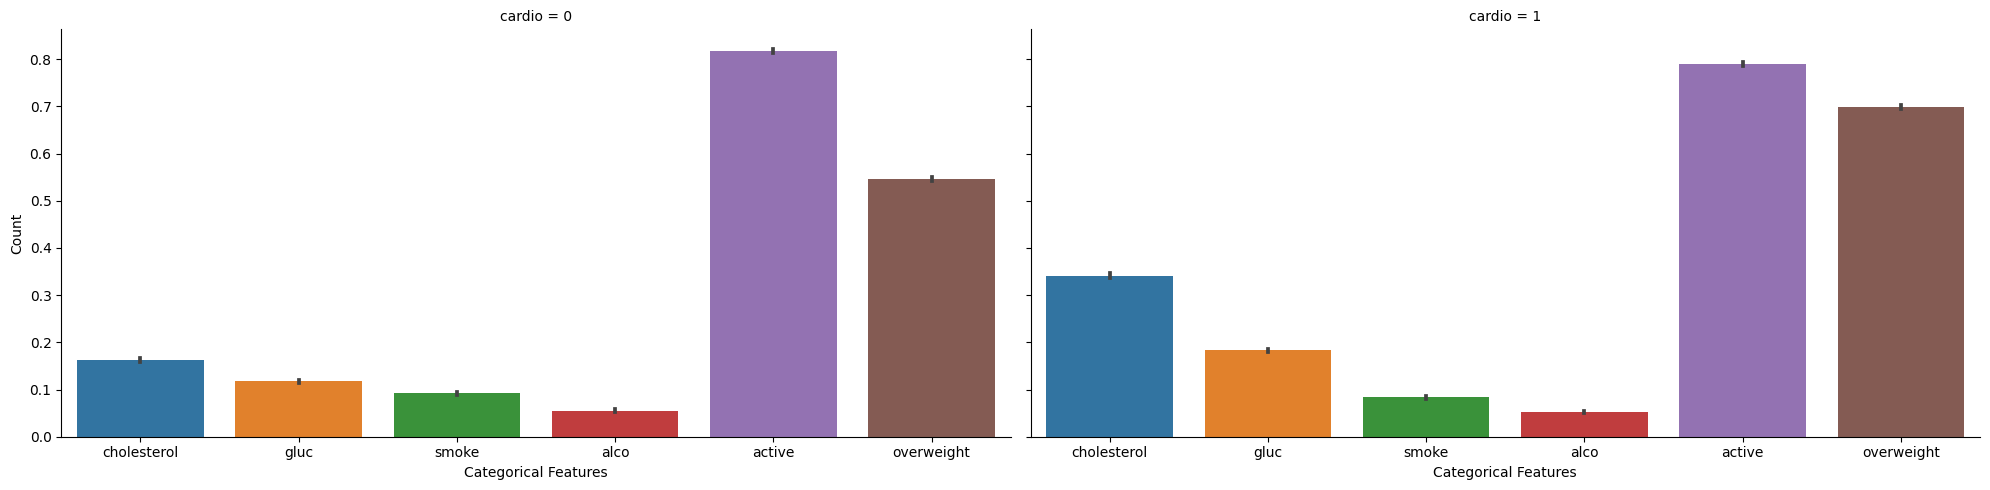

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Melt the DataFrame to convert it into long format
df_cat = pd.melt(df_cat, id_vars=['cardio'], var_name='feature', value_name='count')

# Use catplot to create separate plots for each cardio value
g = sns.catplot(x='feature', y='count', col='cardio', data=df_cat, kind='bar', height=5, aspect=2)

# Set plot titles and labels
fig = g.set_axis_labels('Categorical Features', 'Count')

# Show the plot
fig.savefig('catplot.png')

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('E:/Project/Machine Learning/Freecodecamp - Data Analysis with Python/Mini project/medical_data_visualizer/medical_examination.csv')

# Add 'overweight' column
weight = df['weight']
height = df['height']/100
df['BMI'] = weight/height**2

df['overweight'] = (df['BMI'] >= 25).astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio']]


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.melt(df_cat, id_vars=['cardio'], var_name='feature', value_name='count')
    

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='feature', y='count', col='cardio', data=df_cat, kind='bar', height=5, aspect=2)



    # Get the figure for the output
    fig = g.set_axis_labels('Categorical Features', 'Count')

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm', mask=mask, ax=ax)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

In [33]:
import numpy as np
import matplotlib.pyplot as plt  # Import modul matplotlib.pyplot

def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm', mask=mask, ax=ax)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


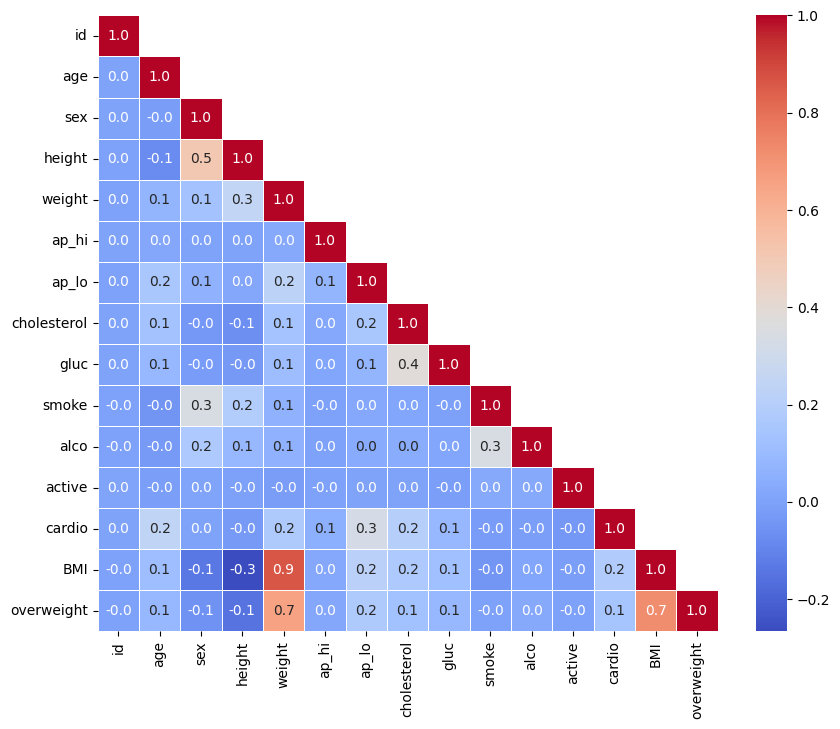

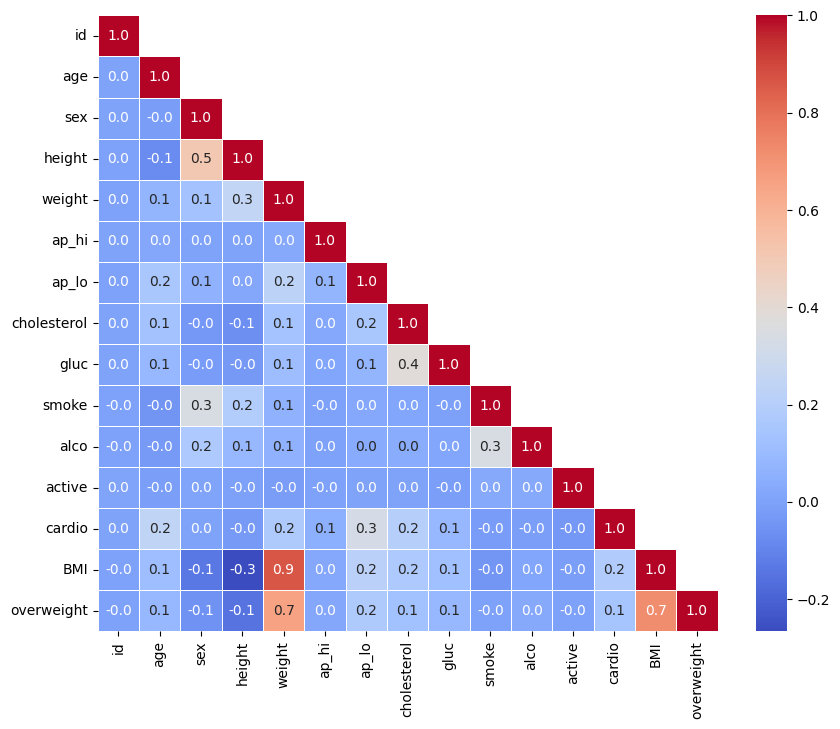

In [35]:
draw_heat_map()